**MLL Project**

# Customer Churn Prediction

2207-B

Live site:  https://mll-project-customer-churn-prediction.streamlit.app/

Github: https://github.com/Binoy-07/MLL-project.git

In [2]:
!pip install imbalanced-learn

Dataset loaded successfully.
--------------------------------------------------
Original Training data Churn count (1/Yes): 1496 (0.27% of total)
--------------------------------------------------
Features have been scaled (StandardScaler applied).
--------------------------------------------------
SMOTE applied to Training Data:
Balanced training sample size: 8276 samples
New Churn (1) count: 4138
New No Churn (0) count: 4138
--------------------------------------------------


/tmp/ipython-input-55086627.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


Model trained successfully on balanced data (SMOTE).

--- Model Performance on UNSEEN Test Data ---
Accuracy Score: 0.7551

Classification Report (Focus on F1-Score, Precision, Recall for Churn=1):
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



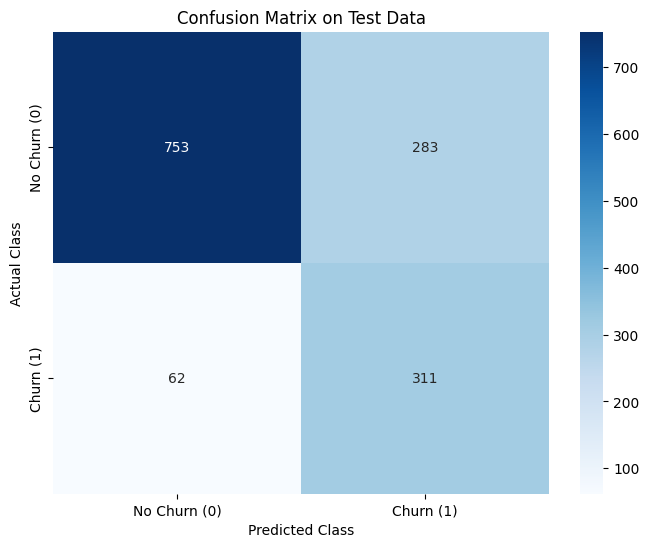

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLL project 2207/Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' file not found.")
    print("Please enter a correct file name or upload the file.")
    exit()

# --- 1. Data Preprocessing and Cleansing ---

df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, drop_first=True)

# --- 3. Train-Test Split ---

X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("-" * 50)
print(f"Original Training data Churn count (1/Yes): {y_train.sum()} ({y_train.mean():.2f}% of total)")
print("-" * 50)

# --- 4. Feature Scaling ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled (StandardScaler applied).")

# --- 5. Data Balancing Using SMOTE (Imbalance Handling) ---

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

print("-" * 50)
print("SMOTE applied to Training Data:")

print(f"Balanced training sample size: {X_train_balanced.shape[0]} samples")
print(f"New Churn (1) count: {y_train_balanced.sum()}")
print(f"New No Churn (0) count: {y_train_balanced.shape[0] - y_train_balanced.sum()}")
print("-" * 50)

# --- 6. Model building and training ---

model = LogisticRegression(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

print("Model trained successfully on balanced data (SMOTE).")

# --- 7. Model Performance Evaluation ---

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n--- Model Performance on UNSEEN Test Data ---")
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report (Focus on F1-Score, Precision, Recall for Churn=1):")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

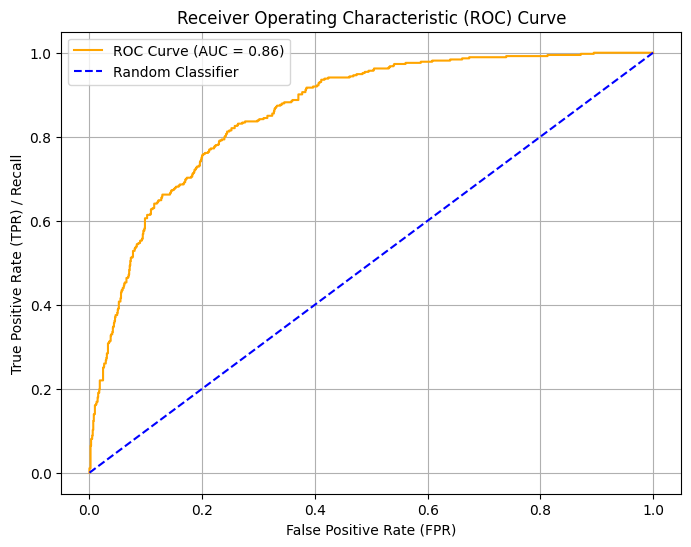

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

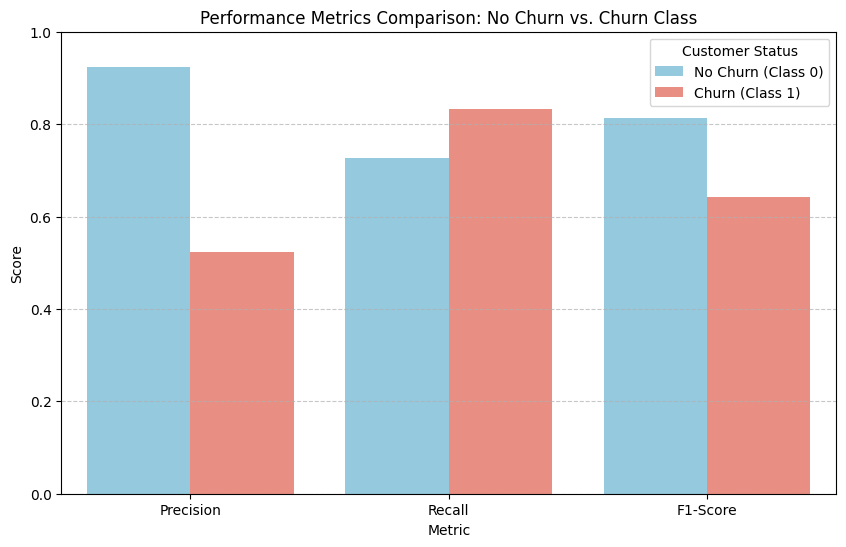


side-by-side bar graph is created.
This graph shows a comparison of Precision, Recall, and F1-Score for Churn (red) and No Churn (blue).


In [5]:

report_data = classification_report(y_test, y_pred, output_dict=True)

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'No Churn (Class 0)': [report_data['0']['precision'], report_data['0']['recall'], report_data['0']['f1-score']],
    'Churn (Class 1)': [report_data['1']['precision'], report_data['1']['recall'], report_data['1']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_melted = metrics_df.melt('Metric', var_name='Class', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted, palette=['skyblue', 'salmon'])
plt.title('Performance Metrics Comparison: No Churn vs. Churn Class')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.legend(title='Customer Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nside-by-side bar graph is created.")
print("This graph shows a comparison of Precision, Recall, and F1-Score for Churn (red) and No Churn (blue).")


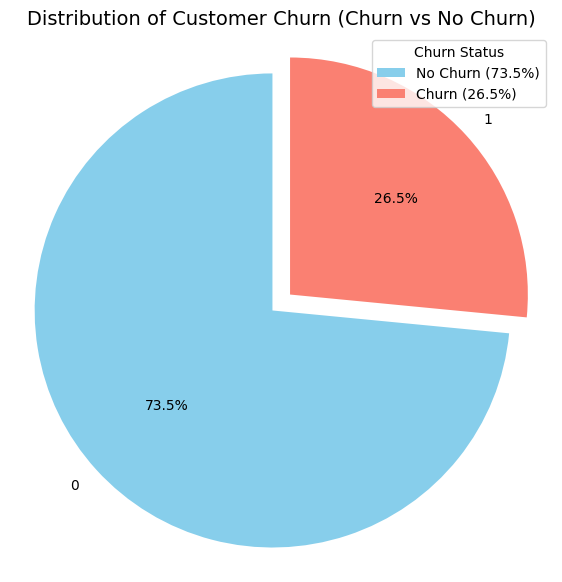


Churn Class Distribution:
Total Customers: 7043
No Churn: 5174 (73.5%)
Churn: 1869 (26.5%)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


churn_counts = df['Churn'].value_counts()
total_samples = churn_counts.sum()

churn_ratios = churn_counts / total_samples * 100

plt.figure(figsize=(7, 7))
plt.pie(
    churn_ratios,
    labels=churn_ratios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    explode=[0, 0.1]
)

plt.title('Distribution of Customer Churn (Churn vs No Churn)', fontsize=14)
plt.legend(title="Churn Status", labels=[f'No Churn ({churn_ratios[0]:.1f}%)', f'Churn ({churn_ratios[1]:.1f}%)'], loc="upper right")
plt.axis('equal')
plt.show()

print("\nChurn Class Distribution:")
print(f"Total Customers: {total_samples}")
print(f"No Churn: {churn_counts[0]} ({churn_ratios[0]:.1f}%)")
print(f"Churn: {churn_counts[1]} ({churn_ratios[1]:.1f}%)")


In [7]:
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

from imblearn.over_sampling import SMOTE


Tracking performance over 200 iterations...
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 50/200 | Train Loss: 0.4737 | Val Loss: 0.4718


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 100/200 | Train Loss: 0.4736 | Val Loss: 0.4719


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 150/200 | Train Loss: 0.4735 | Val Loss: 0.4720


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 200/200 | Train Loss: 0.4733 | Val Loss: 0.4726


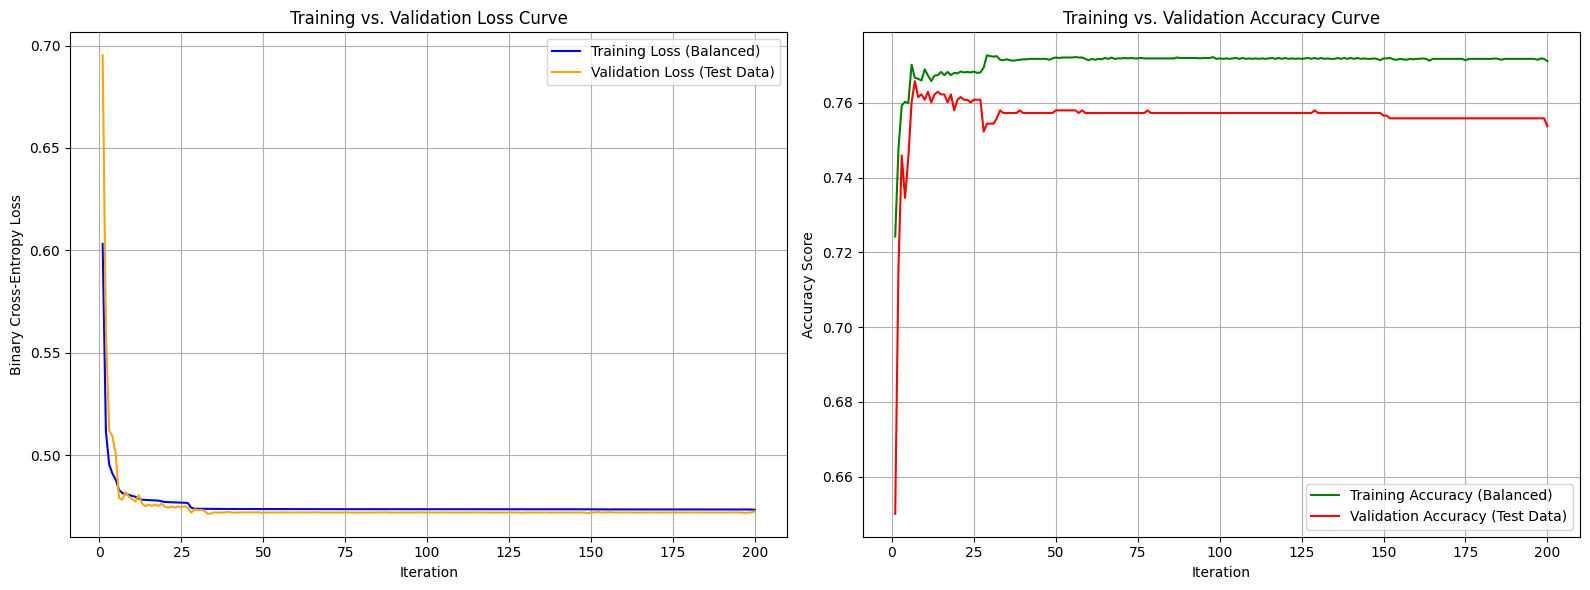

--------------------------------------------------
Loss and Accuracy Curves generated successfully.


In [8]:

train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []


model_tracker = LogisticRegression(random_state=42, warm_start=True, max_iter=1)
n_iterations = 200

print(f"Tracking performance over {n_iterations} iterations...")
print("-" * 50)

for i in range(1, n_iterations + 1):
    model_tracker.fit(X_train_balanced, y_train_balanced)


    y_train_proba = model_tracker.predict_proba(X_train_balanced)
    train_loss = log_loss(y_train_balanced, y_train_proba)
    train_loss_history.append(train_loss)

    y_val_proba = model_tracker.predict_proba(X_test_scaled)
    val_loss = log_loss(y_test, y_val_proba)
    val_loss_history.append(val_loss)

    y_train_pred = model_tracker.predict(X_train_balanced)
    train_acc = accuracy_score(y_train_balanced, y_train_pred)
    train_accuracy_history.append(train_acc)

    y_val_pred = model_tracker.predict(X_test_scaled)
    val_acc = accuracy_score(y_test, y_val_pred)
    val_accuracy_history.append(val_acc)

    if i % 50 == 0:
        print(f"Iteration {i}/{n_iterations} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(range(1, n_iterations + 1), train_loss_history, label='Training Loss (Balanced)', color='blue')
ax1.plot(range(1, n_iterations + 1), val_loss_history, label='Validation Loss (Test Data)', color='orange')
ax1.set_title('Training vs. Validation Loss Curve')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Binary Cross-Entropy Loss')
ax1.legend()
ax1.grid(True)
#

#[Image of Training and Validation Loss Curve]


ax2.plot(range(1, n_iterations + 1), train_accuracy_history, label='Training Accuracy (Balanced)', color='green')
ax2.plot(range(1, n_iterations + 1), val_accuracy_history, label='Validation Accuracy (Test Data)', color='red')
ax2.set_title('Training vs. Validation Accuracy Curve')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy Score')
ax2.legend()
ax2.grid(True)
#

plt.tight_layout()
plt.show()

print("-" * 50)
print("Loss and Accuracy Curves generated successfully.")

**Project finished ✅✅✅**
# Next codes just for trying hosting using Steamlit.

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.5 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 34O1Sy7oLgZ0dgl7Qz6SAWdOEye_7FSSfRy5SPmDDuQLdzK6g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok config add-authtoken 34O1Sy7oLgZ0dgl7Qz6SAWdOEye_7FSSfRy5SPmDDuQLdzK6g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok http 80

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 634, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 622, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/process.py", line 312, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.12/subprocess.py", line 391, in call
    return p.wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(s

In [ ]:
!--pooling-enabled

/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--pretty-print
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [ ]:
%%writefile churn_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

try:
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('logistic_regression_model.pkl')
    encoded_features = joblib.load('encoded_features.pkl')
except FileNotFoundError:
    st.error("Error loading model files! Ensure 'scaler.pkl', 'logistic_regression_model.pkl', and 'encoded_features.pkl' are available.")
    st.stop()

st.set_page_config(page_title="Telco Churn Prediction", layout="wide")
st.title("📞 Customer Churn Prediction App")
st.markdown("### 📊 Logistic Regression Model with SMOTE-Balanced Data")
st.markdown("---")



def user_input_features():
    st.sidebar.header('Input Customer Data')

    tenure = st.sidebar.slider('Tenure (Months)', 0, 72, 24)
    monthly_charges = st.sidebar.slider('Monthly Charges ($)', 18.0, 118.0, 50.0)

    gender = st.sidebar.selectbox('Gender', ('Male', 'Female'))
    partner = st.sidebar.selectbox('Partner Status', ('Yes', 'No'))
    dependents = st.sidebar.selectbox('Dependents', ('Yes', 'No'))

    contract = st.sidebar.selectbox('Contract Type', ('Month-to-month', 'One year', 'Two year'))
    internet_service = st.sidebar.selectbox('Internet Service', ('DSL', 'Fiber optic', 'No'))
    payment_method = st.sidebar.selectbox('Payment Method', ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'))

    data = {'gender': gender,
            'Partner': partner,
            'Dependents': dependents,
            'tenure': tenure,
            'InternetService': internet_service,
            'Contract': contract,
            'MonthlyCharges': monthly_charges,
            'PaymentMethod': payment_method,
           }

    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()


st.subheader('User Input Features')
st.write(input_df)

df_processed = pd.get_dummies(input_df)

final_input = pd.DataFrame(0, index=[0], columns=encoded_features)

for col in df_processed.columns:
    if col in final_input.columns:
        final_input[col] = df_processed[col]


scaled_input = scaler.transform(final_input)


if st.button('♻️Predict Churn'):
    with st.spinner('Predicting.🔃..'):
        prediction = model.predict(scaled_input)
        prediction_proba = model.predict_proba(scaled_input)


        st.markdown("---")
        st.subheader('🔹Prediction Result')

        churn_status = 'YES (High Risk of Churn⚠️)' if prediction[0] == 1 else 'NO (Customer is likely to Stay✅)'

        if prediction[0] == 1:
            st.error(f"### The Model Predicts: **{churn_status}**")
        else:
            st.success(f"### The Model Predicts: **{churn_status}**")

        st.subheader('🔹Prediction Probability')

        proba_df = pd.DataFrame({
            'Probability': [prediction_proba[0][0], prediction_proba[0][1]]
        }, index=['No Churn Probability', 'Churn Probability'])

        st.bar_chart(proba_df)

        st.markdown(f"**Confidence Level:** Churn Probability is **{prediction_proba[0][1]*100:.2f}%**")
        st.markdown("---")

import streamlit as st
st.title("Devloped by BINOY😉!")
# ...

Writing churn_app.py


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os


In [ ]:
import joblib

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(model, 'logistic_regression_model.pkl')

encoded_features = X.columns.tolist()
joblib.dump(encoded_features, 'encoded_features.pkl')



['encoded_features.pkl']

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!streamlit run churn_app.py &>/dev/null&
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Streamlit Public URL:", public_url)

Streamlit Public URL: NgrokTunnel: "https://undecorously-lecithoid-conrad.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
ngrok.kill()